****** Первые 5 строк ******
            Name  Age Group  Score
0    Ivan Petrov   19    A1   95.0
1  Anna Smirnova   18    A1   57.0
2  Dmitry Ivanov   20    B2   82.0
3  Olga Sokolova   21    B2   43.0
4  Sergey Volkov   22    C1   88.0

=== Информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    30 non-null     object 
 1   Age     30 non-null     int64  
 2   Group   26 non-null     object 
 3   Score   28 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None

=== Описательная статистика ===
               Name        Age Group      Score
count            30  30.000000    26  28.000000
unique           30        NaN     9        NaN
top     Ivan Petrov        NaN    B2        NaN
freq              1        NaN     4        NaN
mean            NaN  20.200000   NaN  71.142857
std             NaN 

C:\Users\teymu\AppData\Local\Temp\ipykernel_20920\957784575.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Score"].fillna(df["Score"].mean(), inplace=True)
C:\Users\teymu\AppData\Local\Temp\ipykernel_20920\957784575.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[

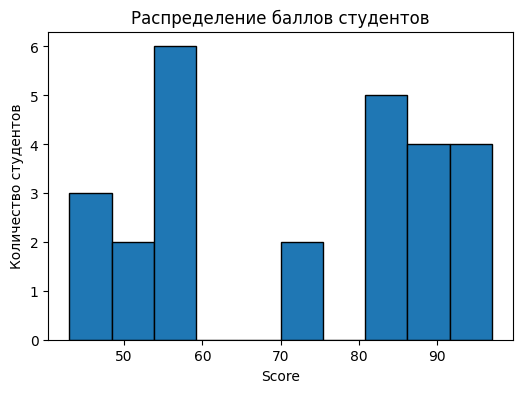

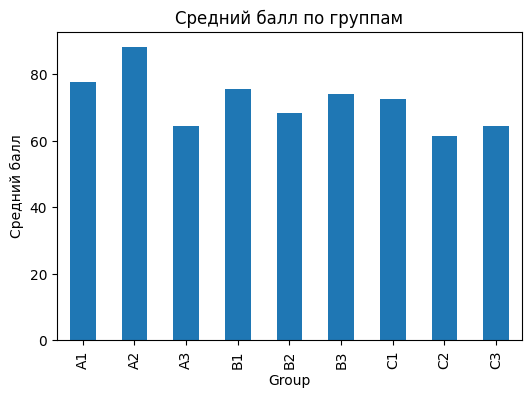

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем CSV
df = pd.read_csv("students.csv")

print("****** Первые 5 строк ******")
print(df.head())

print("\n=== Информация о данных ===")
print(df.info())

print("\n=== Описательная статистика ===")
print(df.describe(include="all"))

# Средний балл студентов
mean_score = df["Score"].mean(skipna=True)
print(f"\nСредний балл студентов: {mean_score:.2f}")

# Количество студентов в каждой группе
group_counts = df["Group"].value_counts()
print("\nКоличество студентов в каждой группе:")
print(group_counts)


# Студенты с баллом выше 80
high_scores = df[df["Score"] > 80]
print("\nСтуденты с баллом > 80:")
print(high_scores)

# Сортировка по убыванию балла
sorted_scores = high_scores.sort_values(by="Score", ascending=False)
print("\nСтуденты >80, отсортированные по убыванию баллов:")
print(sorted_scores)

# Самый старший студент
oldest = df.loc[df["Age"].idxmax()]
print("\nСамый старший студент:")
print(oldest)

# Самый младший студент
youngest = df.loc[df["Age"].idxmin()]
print("\nСамый младший студент:")
print(youngest)


# Проверка на наличие пропусков
print("\nКоличество пропусков в каждом столбце:")
print(df.isnull().sum())

# Заполняем пропуски в Score средним значением
df["Score"].fillna(df["Score"].mean(), inplace=True)

# Удаляем строки с пропусками в Group
df_clean = df.dropna(subset=["Group"])

print("\nПосле обработки пропусков:")
print(df_clean.info())


# Средний балл и медианный возраст по группам
group_stats = df_clean.groupby("Group").agg(
    mean_score=("Score", "mean"),
    median_age=("Age", "median")
)
print("\nСредний балл и медианный возраст по группам:")
print(group_stats)

# Добавляем столбец Passed
df_clean["Passed"] = (df_clean["Score"] >= 60).astype(int)
print("\nДанные с новым столбцом Passed:")
print(df_clean.head())

# Гистограмма распределения баллов
plt.figure(figsize=(6,4))
plt.hist(df_clean["Score"], bins=10, edgecolor="black")
plt.title("Распределение баллов студентов")
plt.xlabel("Score")
plt.ylabel("Количество студентов")
plt.show()

# Столбчатая диаграмма среднего балла по группам
plt.figure(figsize=(6,4))
group_stats["mean_score"].plot(kind="bar")
plt.title("Средний балл по группам")
plt.xlabel("Group")
plt.ylabel("Средний балл")
plt.show()
